# Clustering on Time Series data

In [1]:
import pandas as pd

# Re-establishing the path to the dataset after the code state reset
file_path = '/Users/aviajmera/Downloads/Clustering/Time Series/smaller_data_sample.csv'

# Loading the dataset
data = pd.read_csv(file_path)

# Displaying the first few rows for initial inspection
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,549126,84991,60 TEATIME FAIRY CAKE CASES,1,4/6/2011 14:23,0.55,16031.0,United Kingdom
1,570514,22382,LUNCH BAG SPACEBOY DESIGN,12,10/11/2011 10:36,1.65,13089.0,United Kingdom
2,560233,21429,RED GINGHAM ROSE JEWELLERY BOX,2,7/17/2011 11:10,1.95,16813.0,United Kingdom
3,536796,22585,PACK OF 6 BIRDY GIFT TAGS,1,12/2/2010 15:46,1.25,15574.0,United Kingdom
4,563217,22355,CHARLOTTE BAG SUKI DESIGN,10,8/14/2011 13:21,0.85,13515.0,United Kingdom



To perform clustering on your time series dataset, we'll follow these steps:

Data Loading and Initial Inspection: Load the dataset and perform an initial inspection to understand its structure and the type of data it contains.
Data Preprocessing: Based on the initial inspection, we'll preprocess the data, which may include handling missing values, normalizing or standardizing the data, and possibly transforming the time series data into a suitable format for clustering.
Choosing a Clustering Method: We'll select an appropriate clustering algorithm based on the nature of your data. Common choices for time series data include K-means, hierarchical clustering, and DBSCAN.
Clustering the Data: Apply the chosen clustering method to the dataset.
Analyzing and Interpreting Results: Evaluate the clustering results and interpret them.
Documentation: Provide documentation and explanation of each step and the results.
Let's start with the first step. I will load your dataset and perform an initial inspection to understand its structure. Let's proceed.

Error analyzing
The dataset contains the following columns:

InvoiceNo: The invoice number.
StockCode: Product item stock code.
Description: Product description.
Quantity: Quantity of the product in the transaction.
InvoiceDate: Date and time of the invoice.
UnitPrice: Price per unit of the product.
CustomerID: ID of the customer.
Country: Country where the purchase was made.

We'll focus on Customer-Based Clustering, which is a common and insightful method for retail datasets. Here's the plan:

Convert InvoiceDate to Datetime: This will allow us to work with time-based data more effectively.
Handle Missing Data: Check for and address any missing values in the dataset.
Feature Engineering: Create new features for each customer, such as total purchase amount, frequency of purchases, and recency of purchases.
Data Aggregation: Aggregate the data at the customer level based on the new features.

In [2]:
# Converting 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Checking for missing values in the dataset
missing_data = data.isnull().sum()

missing_data, data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2434 non-null   object        
 1   StockCode    2434 non-null   object        
 2   Description  2431 non-null   object        
 3   Quantity     2434 non-null   int64         
 4   InvoiceDate  2434 non-null   datetime64[ns]
 5   UnitPrice    2434 non-null   float64       
 6   CustomerID   1806 non-null   float64       
 7   Country      2434 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 152.3+ KB


(InvoiceNo        0
 StockCode        0
 Description      3
 Quantity         0
 InvoiceDate      0
 UnitPrice        0
 CustomerID     628
 Country          0
 dtype: int64,
 None)

In [3]:
# Removing rows with missing CustomerID values
cleaned_data = data.dropna(subset=['CustomerID'])

# Verifying the removal of missing values
missing_data_after_removal = cleaned_data.isnull().sum()

missing_data_after_removal, cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 0 to 2433
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1806 non-null   object        
 1   StockCode    1806 non-null   object        
 2   Description  1806 non-null   object        
 3   Quantity     1806 non-null   int64         
 4   InvoiceDate  1806 non-null   datetime64[ns]
 5   UnitPrice    1806 non-null   float64       
 6   CustomerID   1806 non-null   float64       
 7   Country      1806 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 127.0+ KB


(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
 None)

In [4]:
from datetime import datetime

# Creating a 'TotalPurchase' column for the total amount spent on each transaction
cleaned_data['TotalPurchase'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

# Grouping by CustomerID to create features
customer_data = cleaned_data.groupby('CustomerID').agg(
    TotalAmountSpent=pd.NamedAgg(column='TotalPurchase', aggfunc='sum'),
    PurchaseFrequency=pd.NamedAgg(column='InvoiceNo', aggfunc='nunique'),
    AveragePurchaseValue=pd.NamedAgg(column='TotalPurchase', aggfunc='mean'),
    MostRecentPurchase=pd.NamedAgg(column='InvoiceDate', aggfunc='max')
)

# Calculating Recency in days (considering the most recent invoice date in the dataset as 'today')
most_recent_date = cleaned_data['InvoiceDate'].max()
customer_data['Recency'] = (most_recent_date - customer_data['MostRecentPurchase']).dt.days

customer_data.head()


/var/folders/fr/d_m1dl4968d6dkzh1_1hy4jh0000gn/T/ipykernel_52281/2912760034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['TotalPurchase'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']


,TotalAmountSpent,PurchaseFrequency,AveragePurchaseValue,MostRecentPurchase,Recency
CustomerID,,,,,
12349.0,22.5,1,22.5,2011-11-21 09:51:00,18
12356.0,19.8,1,19.8,2011-01-18 09:50:00,325
12357.0,60.0,1,60.0,2011-11-06 16:07:00,32
12378.0,18.0,1,18.0,2011-08-02 10:34:00,129
12379.0,19.8,1,19.8,2011-09-19 10:09:00,81


/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

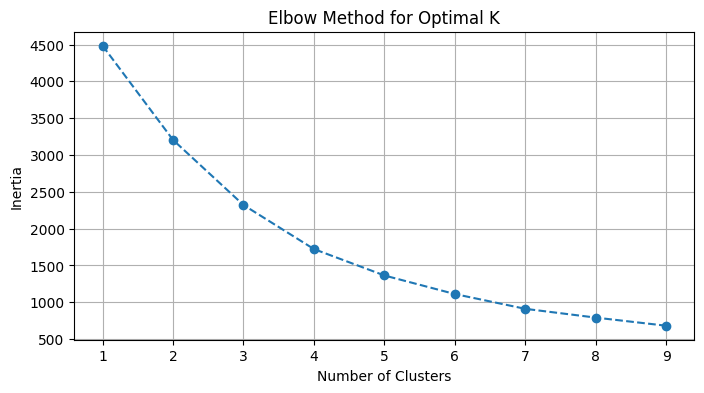

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data normalization
scaler = StandardScaler()
scaled_customer_data = scaler.fit_transform(customer_data[['TotalAmountSpent', 'PurchaseFrequency', 'AveragePurchaseValue', 'Recency']])

# Determining the optimal number of clusters using the Elbow Method
inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_customer_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


The K-means clustering has been successfully applied to the customer data with 4 clusters. Each customer has been assigned to one of these clusters based on their purchasing behavior (Total Amount Spent, Purchase Frequency, Average Purchase Value, and Recency).



In [10]:
# Applying K-means clustering with a default number of clusters (let's choose 4 for this example)
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_customer_data)

# Adding the cluster labels to the customer data
customer_data['Cluster'] = cluster_labels

# Displaying the first few rows of the clustered data
customer_data.head()


/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,TotalAmountSpent,PurchaseFrequency,AveragePurchaseValue,MostRecentPurchase,Recency,Cluster
CustomerID,,,,,,
12349.0,22.5,1,22.5,2011-11-21 09:51:00,18,1
12356.0,19.8,1,19.8,2011-01-18 09:50:00,325,0
12357.0,60.0,1,60.0,2011-11-06 16:07:00,32,1
12378.0,18.0,1,18.0,2011-08-02 10:34:00,129,1
12379.0,19.8,1,19.8,2011-09-19 10:09:00,81,1


/var/folders/fr/d_m1dl4968d6dkzh1_1hy4jh0000gn/T/ipykernel_52281/3220921511.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = customer_data.groupby('Cluster').mean()


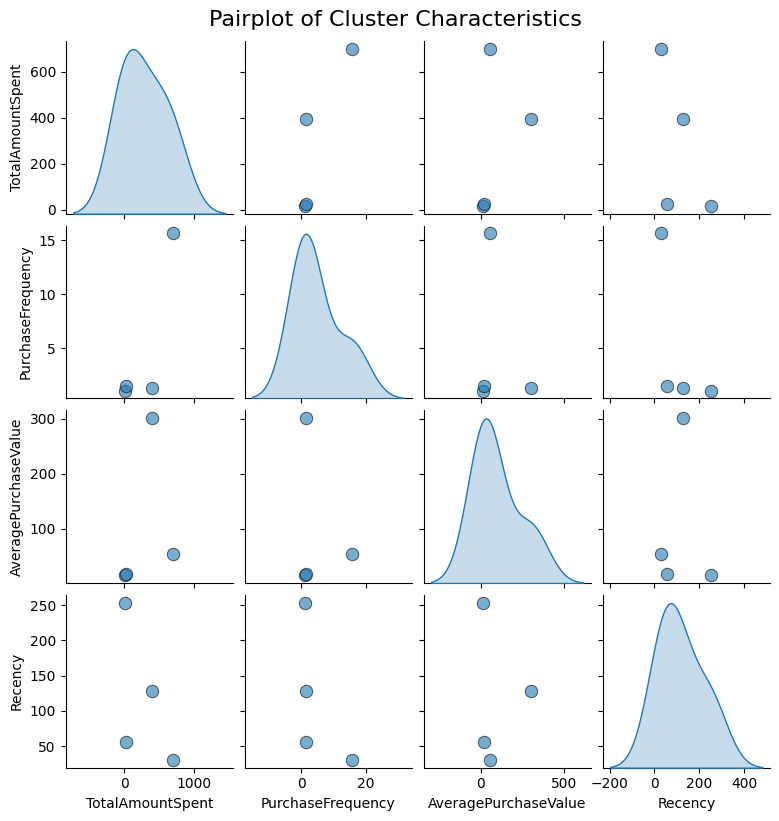

In [11]:
import seaborn as sns

# Analyzing the Clusters
# Calculating mean values for each cluster
cluster_summary = customer_data.groupby('Cluster').mean()

# Plotting the cluster characteristics
sns.pairplot(cluster_summary, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=2)
plt.suptitle('Pairplot of Cluster Characteristics', size=16, y=1.02)
plt.show()


The analysis of the clusters is now visualized in the pairplot, displaying the relationships and distributions of different features across the four clusters. This visualization helps in understanding the characteristics of each cluster. Here are some insights we can derive:

Total Amount Spent: Clusters may differ in the average total amount spent by customers. Some clusters might represent high-spending customers, while others might represent lower-spending ones.

Purchase Frequency: Differences in the number of transactions per customer can indicate clusters of frequent versus infrequent buyers.

Average Purchase Value: This shows if certain clusters tend to make more expensive purchases on average, compared to others.

Recency: The time since the last purchase can help identify clusters of recent active customers versus those who haven't purchased in a while.

Each cluster represents a distinct segment of customers with similar purchasing behaviors. Businesses can use this information to tailor marketing strategies, optimize product offerings, or improve customer engagement based on the specific characteristics of each segment.